In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])
plt.rcParams.update({
    "font.family": "Arial",   # specify font family here
    "font.serif": ["sans-serif"],  # specify font here
    "font.size":11})          # specify font size here

from scipy import constants
from scipy.signal import find_peaks

#Import personal functions
import sys
#sys.path.append("C:/Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
sys.path.append("C:/Users/Olivi/Documents/Git/SoRoMa/Thermal_Soft_Robotics_data/Functions")

import FluidicSetupFunctions
from save_plot_func import save_plot

In [2]:
#Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Videos"
Location = r"C:\Users\Olivi\Documents\Git\SoRoMa\Thermal_soft_robotics_data\Thermal_actuation\Experimental\Fluidic\Videos"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 2
Loading... Folder 1 of 1, Sample 2 of 2


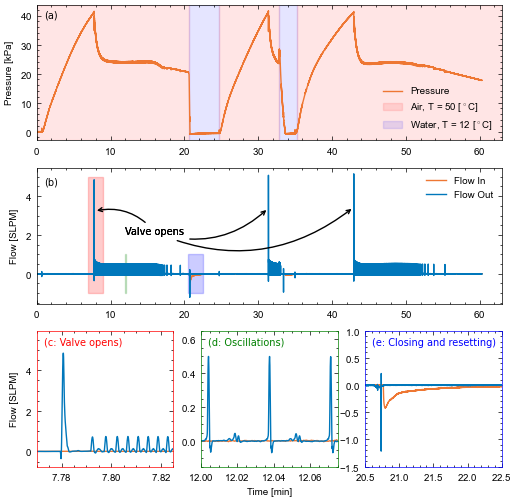

In [9]:
import matplotlib.pyplot as plt

# Assuming 'data' is already defined and contains your data
fs = data[1]['Samplerate'][-1]
P = data[0][-1]['MPX100-3']/1000
t = data[0][-1]['Time']/60
Q_out = data[0][-1]['AWM15-1']
Q_in = data[0][-1]['AWM20-12'] * -1

# Creating the figure and the grid of subplots
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
ax3 = plt.subplot2grid((3, 3), (2, 0))
ax4 = plt.subplot2grid((3, 3), (2, 1))
ax5 = plt.subplot2grid((3, 3), (2, 2))

# Plotting data in each subplot
ax1.plot(t, P, label='Pressure')
ax2.plot(t, Q_in, label='Flow In')
ax2.plot(t, Q_out, label='Flow Out')

ax3.plot(t, Q_in)
ax3.plot(t, Q_out)

ax4.plot(t, Q_in)
ax4.plot(t, Q_out)

ax5.plot(t, Q_in)
ax5.plot(t, Q_out)

# Setting labels and titles
ax1.set_ylabel('Pressure [kPa]')
ax2.set_ylabel('Flow [SLPM]')
ax3.set_ylabel('Flow [SLPM]')
ax4.set_xlabel('Time [min]')
#ax4.set_ylabel('Flow [SLPM]')
#ax5.set_ylabel('Flow [SLPM]')

title_font = {'fontsize': 7} 
#ax1.set_title('Pressure over Time')
#ax2.set_title('Flow over Time')
#ax3.set_title('Valve opens', fontdict=title_font)
#ax4.set_title('Zoomed Flow (2)')
#ax5.set_title('Zoomed Flow (3)')



# Zooming in on the x-axis for ax3, ax4, and ax5
ax1.set_xlim(0, 63)
ax2.set_xlim(0, 63)
ax3.set_xlim(7.77, 7.825)
ax3.set_ylim(-0.75, 5.95)
ax4.set_xlim(12, 12.075)
ax4.set_ylim(-0.15, 0.65)
ax5.set_xlim(20.5, 22.5)
ax5.set_ylim(-1.5, 1)  # Corrected ylim for ax5

# Define the coordinates and dimensions for the zoomed areas along with their colors
zoom_areas = [(7, 9, -1, 5, 'red'), (12, 12.075, -1, 1, 'green'), (20.5, 22.5, -1, 1, 'blue')]

for start_x, end_x, start_y, end_y, color in zoom_areas:
    # Calculate width and height of the rectangle
    rect_width = end_x - start_x
    rect_height = end_y - start_y

    # Create and add the rectangle patch to ax2
    rect = patches.Rectangle((start_x, start_y), rect_width, rect_height, 
                             linewidth=1, edgecolor=color, facecolor=color, alpha=0.2)
    ax2.add_patch(rect)

# Apply the same colors to the outlines of the corresponding zoomed subplots
for ax, color in zip([ax3, ax4, ax5], ['red', 'green', 'blue']):
    for spine in ax.spines.values():
        spine.set_edgecolor(color)

# Adding colored background to ax1
ax1.axvspan(0, 20.6, color='red', alpha=0.1, label='Air, T = 50 [$^\circ$C]')  
ax1.axvspan(20.6, 24.75, color='blue', alpha=0.1, label='Water, T = 12 [$^\circ$C]')  

# Setting legend
ax1.legend()
ax2.legend()

ax1.axvspan(24.75, 32.8, color='red', alpha=0.1, label='Air, T = 50 [$^\circ$C]')   # Red background from t = 0 to 20
ax1.axvspan(32.8, 35.2, color='blue', alpha=0.1, label='Water, T = 12 [$^\circ$C]')  # Blue background from t = 20 to 26

ax1.axvspan(35.2, 63, color='red', alpha=0.1, label='Air, T = 50 [$^\circ$C]')

# Find the 3 biggest peaks in Q_out
peaks, _ = find_peaks(Q_out, distance=fs)  # 'distance' parameter can be adjusted as needed
top_peaks = peaks[np.argsort(Q_out[peaks])][-3:]  # Get the indices of the 3 largest peaks

# Annotate these peaks on ax2
for peak in top_peaks:
    #ax2.plot(t[peak], Q_out[peak], "x")  # Mark the peak
    ax2.annotate('Valve opens', xy=(t[peak], Q_out[peak]*(2/3)), xytext=(12, 2),
                 arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3,rad=0.3"),
                family='sans-serif', fontsize=7)

# Adding letters to each subplot
# Label positions for each subplot
label_positions = [(1, 40), (1, 4.75), (0.05, 0.95), (0.05, 0.95), (0.05, 0.95)]
subplots = [ax1, ax2, ax3, ax4, ax5]
labels = ['a', 'b', 'c: Valve opens', 'd: Oscillations', 'e: Closing and resetting']
colors = ['black', 'black', 'red', 'green', 'blue']  # Colors for each subplot label

for ax, label, (xpos, ypos), color in zip(subplots, labels, label_positions, colors):
    if ax in [ax1, ax2]:
        ax.text(xpos, ypos, f'({label})', fontsize=7, verticalalignment='center', 
                horizontalalignment='left', family='sans-serif', color=color)
    else:
        ax.text(xpos, ypos, f'({label})', transform=ax.transAxes, fontsize=7,
                verticalalignment='top', horizontalalignment='left', family='sans-serif', color=color)

#plt.tight_layout()
#plt.show()
plt.savefig('figures/system_test.png', dpi=500, bbox_inches='tight')


(0.0, 10.0)

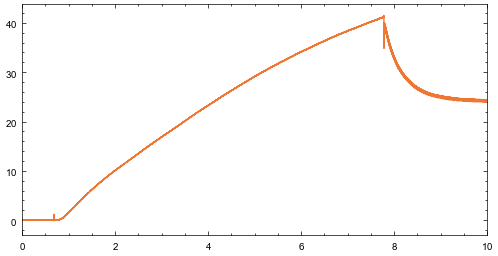

In [4]:
plt.figure(figsize=(6,3))

plt.plot(t,P)
plt.xlim(0,10)

Integrated Q_in: 0.007969876755296913
Integrated Q_out: -0.03139284961175869


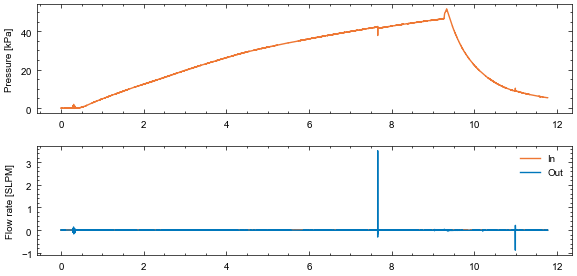

In [5]:
# first run 
P = data[0][0]['MPX100-3']/1000
t = data[0][0]['Time']/60
Q_out = data[0][0]['AWM15-1']
Q_in = data[0][0]['AWM20-12']*-1

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6, 3))
#ax2 = ax1.twinx()

ax1.plot(t,P)
ax1.set_ylabel('Pressure [kPa]')
ax2.plot(t,Q_in, label= 'In')
ax2.plot(t,Q_out, label = 'Out')
ax2.set_ylabel('Flow rate [SLPM]')
ax2.legend()

# Integrating Q_in and Q_out
Q_in_integral = np.trapz(Q_in, t)
Q_out_integral = np.trapz(Q_out, t)

print("Integrated Q_in:", Q_in_integral)
print("Integrated Q_out:", Q_out_integral)

plt.tight_layout()
plt.show()